# Linear Regresssion
if the data is linear or showing linear trend then we use linear regression. types of linear regession are 
1. simple linear regression(one independent variable, predict the dependent variabe)
2. mutliple linear regression(two or more independent variable predict the dependent variable)
## LogisticRegression
if the data have a linear combination among them then logistic Regression uses sigmoid function to classify them
### Support vector machine (SVM)
we can use Svm on linear data as well as on non linear data(linear data means, data that is showing some linear trend iseated of scatterness. showing some trend)
1. Regression 
2. Classification
3. outliers dectection
#### KNN
this model tells us the unknown data point how much is this far from other data point using different distance parameter\
knn can also be used on non paramertic data. 
##### Descision Tree classification
general strcture of tree (root ,stem branches ,leaves , flowers). in this model we make tree based on probability.

# Decision Tree Classification

## Node
1. the point where data is split into futher nodes 
2. node is the point where descision is made
3. root node (the first node where starts to divide)
4. decision node is element of decision tree that futher splits into nodes (nternal node)
5. .leaf node ( the node which doesnot split anymore. last node)(give you final decision)(outcome)
6. pruning: removing sub nodes making less node

# Entropy
impurity (mixture of manything) not pure.\
measure of randomness /disorders/impurity.\
Qunatify the impurity\
Entropy is zero 0 when all elements are in same class no disorder\
Entropy is highest when all the elements are different classes highest disorder

## Information Gain
Information gain is measured reduction in the entropy our data is becoming more pure decreasing inpurity
information will highest at the lead node

## Gini impurity
Gini impurity is another measure it determine how many times a randomnly choosen elements is incorrectly labelled according to the distribution of labels of subset.

## comparing Gini inpurity and Entropy


In [67]:
# example of entropy and gini impurity
# let's make a dataset with different classes
#  no of element in each class 
n_a=4
n_b=6
total=n_a+n_b

In [68]:
# let us calculate porportion of each class
p_a=n_a/total
p_b=n_b/total
print('p_a is:', p_a)
print('p_bis:',p_b)
# Entropy is 
# is the measure of uncertainty
import math
entropy= -p_a*math.log2(p_a)-p_b*math.log2(p_b)
print('entropy:',entropy)

p_a is: 0.4
p_bis: 0.6
entropy: 0.9709505944546686


#### Gini impurity

In [69]:
gini1=1-p_a**2 -p_b**2

print('Gini impurity:', gini1)

Gini impurity: 0.48


In [70]:
# import libraries 
import pandas as pd 
import seaborn as sns
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.impute import SimpleImputer

In [71]:
# load the dataset 
df= sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [72]:
# imputing missing values 
df.drop(['deck'],axis=1,inplace=True)

In [73]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [74]:
imputer=SimpleImputer(strategy='median')
df[['age', 'fare']]=imputer.fit_transform(df[['age','fare']])
imputer=SimpleImputer(strategy='most_frequent')
df[['embarked','embark_town']]=imputer.fit_transform(df[['embarked','embark_town']])

In [75]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [76]:
# Encoding categorical and object columns using for loop 
# let's call encoder here 
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype=='category' or df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])


[[79 18]
 [26 56]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        97
           1       0.76      0.68      0.72        82

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.75      0.75      0.75       179



<Axes: >

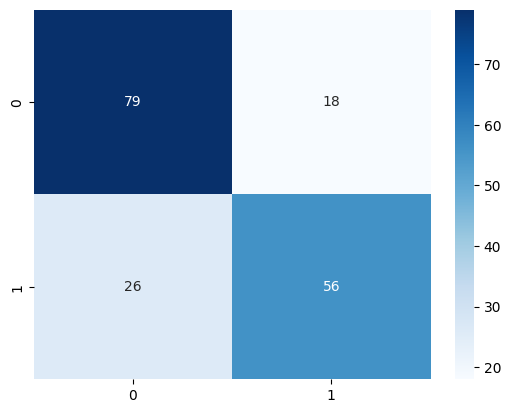

In [77]:
# now split the data into x and y 
x=df.drop(['survived','alive'],axis=1)
y=df['survived']
# split the data into traning and testing data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
# let's call the model 
model=DecisionTreeClassifier()
# model fit on data 
model.fit(x_train,y_train)
# predict the data 
y_pred=model.predict(x_test)
# Evaluate the mode 
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
sns.heatmap(confusion_matrix(y_pred,y_test),cmap='Blues',annot=True)

In [78]:
# saving the model 
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='./Saved_model/04_Decision_tree_01.dot',feature_names=x.columns,filled=True, rounded=True )

------

# Regression analysis using Decision tree

In [ ]:
# importing libraries
import pandas as pd 
import numpy as np 
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from sklearn.metrics import r2_score,mean_squared_error
# load the dataset
df=px.data.tips()
df.head()
df.info()
# preprocess our data 
# here call our encoder here 
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])
# now split the data into x and y 
x=df.drop('tip',axis=1)
y=df['tip']
# split the data into training and testing 
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)
# now call the model 
model=DecisionTreeRegressor()
# fit the model on data 
model.fit(x_train,y_train)
# predict the model
y_pred=model.predict(x_test)
# Evaluate the model
print(f'r2_score',r2_score(y_pred,y_test))
print(f'MSE:',mean_squared_error(y_pred,y_test))
print(f'RMSE:',(np.sqrt(mean_squared_error(y_pred,y_test))))
# save the model 
export_graphviz(model,out_file='./Saved_model/05_Decision_tree_regressor.dot',feature_names=x.columns,rounded=True,filled=True)

